<a href="https://colab.research.google.com/github/elchicha/DeepLearning_AISV-X401/blob/main/Week5/Hyper_params.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Activity 1: Hyperparameter Tuning**

In [ ]:
#Install dependencies

!pip install tensorflow
!pip install keras
!pip install keras-tune

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 766.4 kB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from kerastuner.tuners import RandomSearch


# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Define model builder function
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Flatten(input_shape=(28, 28)))

    # Tune the number of units in the first Dense layer
    hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
    model.add(layers.Dense(units=hp_units, activation='relu'))
    model.add(layers.Dense(10))

    # Tune the learning rate for the optimizer
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                  loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

    return model

# Initialize the tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=3,
    executions_per_trial=3,
    directory='my_dir',
    project_name='helloworld')

# Perform hyperparameter search
tuner.search(x_train, y_train,
             epochs=5,
             validation_data=(x_test, y_test))

Trial 3 Complete [00h 03m 53s]
val_accuracy: 0.9786666830380758

Best val_accuracy So Far: 0.9786666830380758
Total elapsed time: 00h 12m 56s


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8849 - loss: 0.3816 - val_accuracy: 0.9390 - val_loss: 0.2096
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9438 - loss: 0.1865 - val_accuracy: 0.9455 - val_loss: 0.1972
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9509 - loss: 0.1629 - val_accuracy: 0.9481 - val_loss: 0.1784
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9565 - loss: 0.1478 - val_accuracy: 0.9509 - val_loss: 0.1761
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9572 - loss: 0.1484 - val_accuracy: 0.9546 - val_loss: 0.1811
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8832 - loss: 0.4018 - val_accuracy: 0.9598 - val_loss: 0.1291
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.9683 - loss: 0.1059 - val_accuracy: 0.9729 - val_loss: 0.0864
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9794 - loss: 0.0698 - val_a

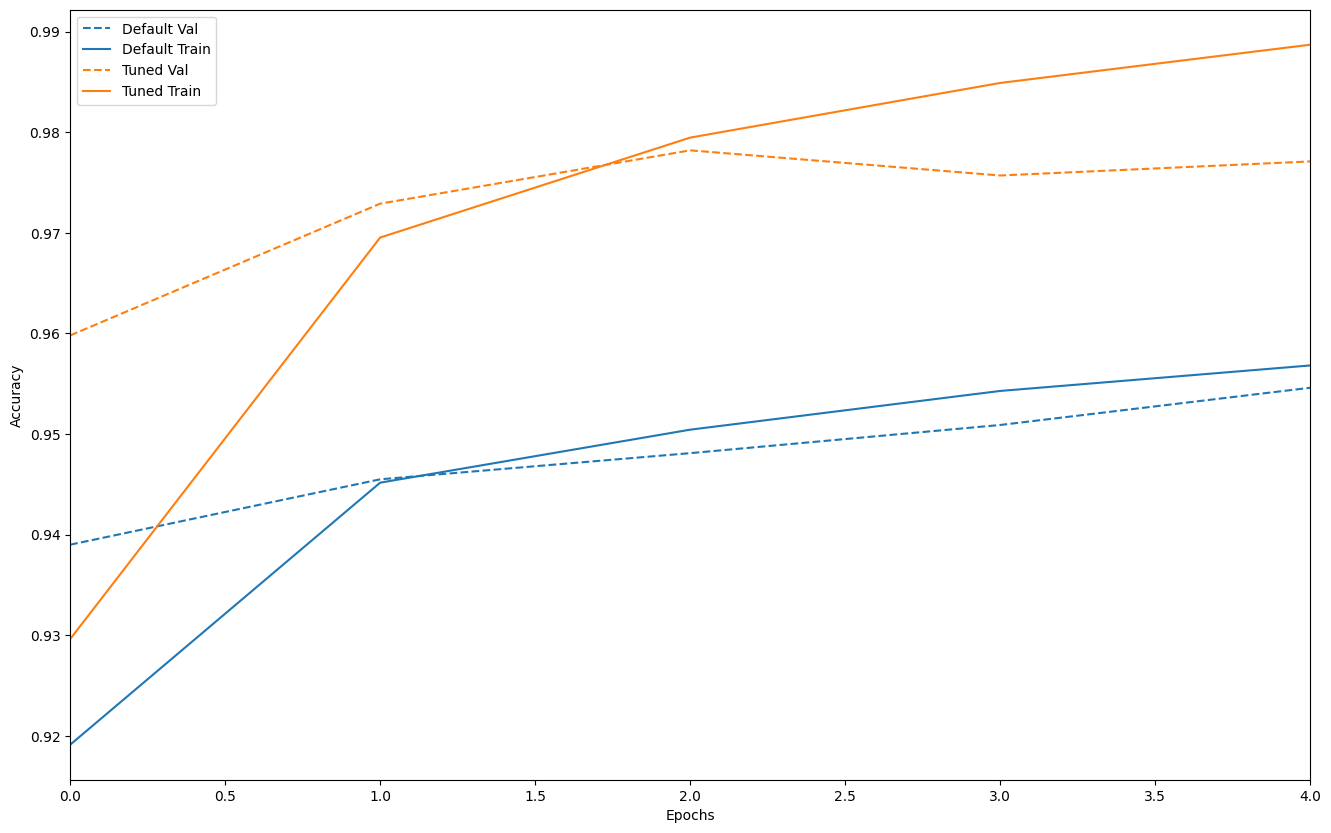

In [ ]:
#Visualize the results

import matplotlib.pyplot as plt
import keras_tuner

def plot_history(histories, key='accuracy'):
    plt.figure(figsize=(16,10))

    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                       '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
                 label=name.title()+' Train')

    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_',' ').title())
    plt.legend()

    plt.xlim([0,max(history.epoch)])

# Build the model with the same architecture as the tuned model, but with default hyperparameters
model_default = build_model(keras_tuner.HyperParameters()) # Use build_model with empty hyperparameters
history_default = model_default.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Get the best model from hyperparameter tuning
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
model_tuned = tuner.hypermodel.build(best_hps)
history_tuned = model_tuned.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Compare the two models
plot_history([('Default', history_default), ('Tuned', history_tuned)])

## Activity 2: Convolutional Neural **Networks**

In [ ]:
# Install dependencies
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam

# Data Preprocessing
y_train_encoded = to_categorical(y_train, 10)
y_test_encoded = to_categorical(y_test, 10)

In [ ]:
#create the model
def create_cnn_model():
    model = keras.models.Sequential([
        keras.layers.Conv2D(128, (3,3), activation='relu', padding='same', input_shape=(28,28,1)),
        keras.layers.MaxPooling2D(2,2),
        keras.layers.Conv2D(64, (3,3), activation='relu'),
        keras.layers.MaxPooling2D(2,2),
        keras.layers.Flatten(),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])
    return model
model = create_cnn_model()
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 128)         │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 12, 12, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 371,402 (1.42 MB)

 Trainable params: 371,402 (1.42 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training
model.fit(x_train, y_train_encoded, epochs=5, batch_size=64, validation_split=0.2)


Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 182s 241ms/step - accuracy: 0.8888 - loss: 0.3561 - val_accuracy: 0.9823 - val_loss: 0.0566
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 176s 235ms/step - accuracy: 0.9870 - loss: 0.0425 - val_accuracy: 0.9880 - val_loss: 0.0417
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 201s 234ms/step - accuracy: 0.9906 - loss: 0.0295 - val_accuracy: 0.9892 - val_loss: 0.0338
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 175s 233ms/step - accuracy: 0.9938 - loss: 0.0192 - val_accuracy: 0.9888 - val_loss: 0.0366
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 205s 238ms/step - accuracy: 0.9957 - loss: 0.0131 - val_accuracy: 0.9916 - val_loss: 0.0324


In [ ]:
# Evaluation
test_loss, test_accuracy = model.evaluate(x_test, y_test_encoded)
print("Test Accuracy:", test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.9872 - loss: 0.0369
Test Accuracy: 0.9905999898910522


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


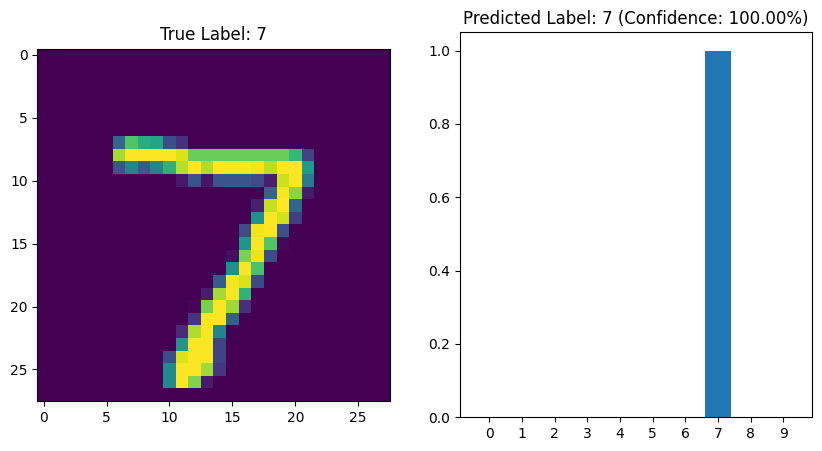

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


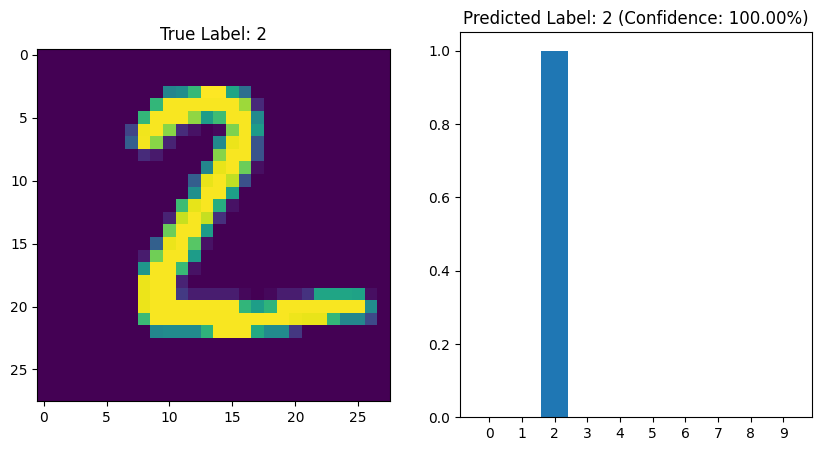

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


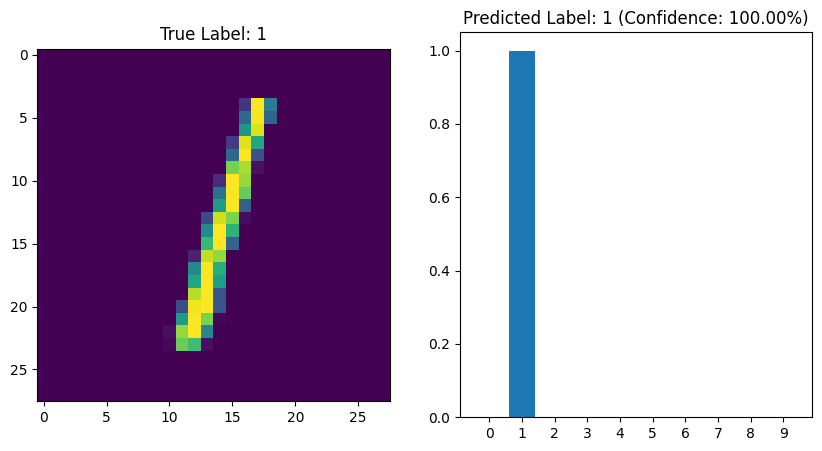

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


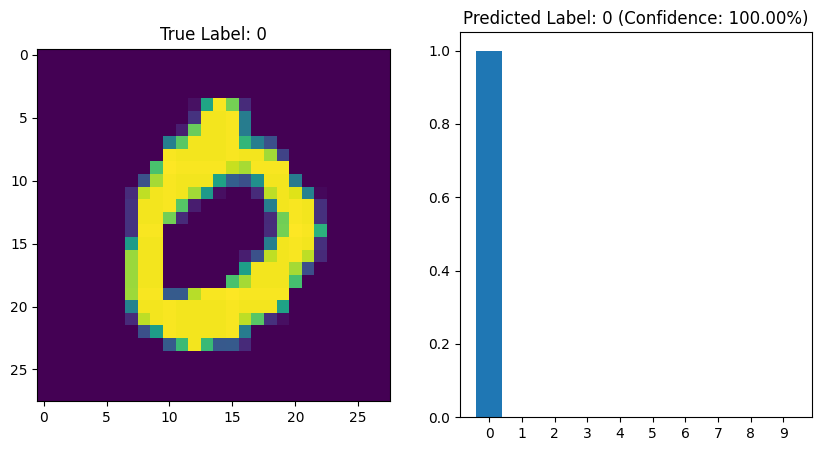

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


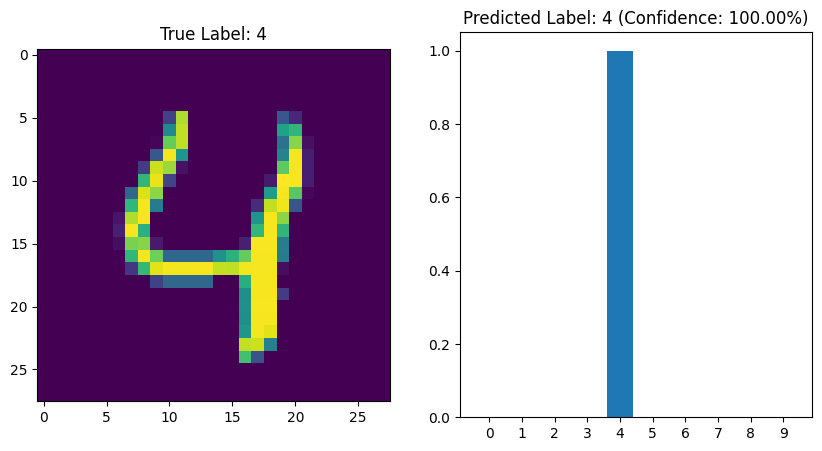

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Visualize sample images and model predictions
num_samples = 5

for i in range(num_samples):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(x_test[i])
    plt.title(f"True Label: {np.argmax(y_test_encoded[i])}")

    prediction = model.predict(x_test[i:i+1])[0]
    predicted_label = np.argmax(prediction)
    confidence = prediction[predicted_label] * 100

    plt.subplot(1, 2, 2)
    plt.bar(range(10), prediction)
    plt.title(f"Predicted Label: {predicted_label} (Confidence: {confidence:.2f}%)")
    plt.xticks(range(10))

    plt.show()